# Pytorch Workflow

Exploring the example of pytorch end-to-end workflow


In [ ]:
import torch
from torch import nn # nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

# checking the pytorch version

torch.__version__


'2.4.1+cu121'

# 1.Data (preparing and loading)

Data can be almost anything... in machine learning

* Excel speadsheet
* Images of any kind
* Videos (youtube has lots of data...)
* Audio like songs or photos
* DNA
* Text

Machine learning or deep learning is a game of two parts
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this,lets create some *known* data using the linear regression formula.

We'll use a liner regression formula to make a straight line without known parameters.



In [ ]:
# Create a known paramter

weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)  # X is capital beacus in deep learning X represents the matrix or the tensor
y = weight * X + bias # output
X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

In [ ]:
X.ndim

2

In [ ]:
X.shape

torch.Size([50, 1])

## splitting the data into the training and test data (Important concept in machine learning in General)
Let's create a train and test split

In [ ]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split],y[:train_split]
X_test , y_test = X[train_split:],y[train_split:]

In [ ]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

# Visualize the Data

In [ ]:
def plot_prediction (train_data = X_train , train_labels = y_train , test_data = X_test , test_labels = y_test , predictions = None):
  """
  plot training data ,test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot the tarining data in the blue
  plt.scatter(train_data,train_labels , c="b" , s=4 , label="Training Data")

  # Plot the test data in the green
  plt.scatter(test_data , test_labels , c="g" , s=4 , label="Test Data")

  # if predictions are passed,plot them in red
  if predictions is not None:
    plt.scatter(test_data , predictions , c="r" , s=4 , label  = "Predictions")

  # show the legend
  plt.legend(prop={"size":14})




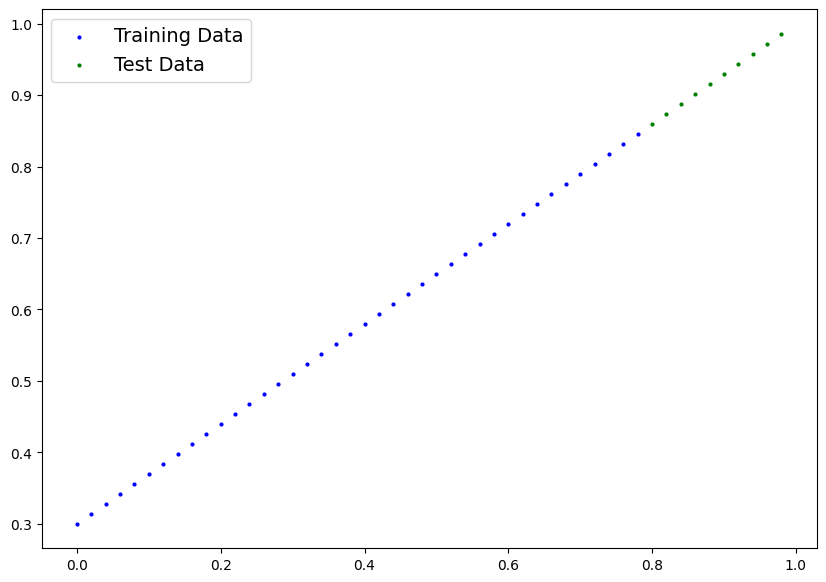

In [ ]:
plot_prediction()

## Build the model

First pytorch model!

How does it do so ?
1. Gradient descent
2. BackPropagation

In [ ]:
# from torch import nn
# class LinearRegressionModel(nn.Module):

#     def __init__ (self):
#       super().__init__()
#       self.weights = nn.parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
#                                           dtype=torch.float),
#                               requires_grad=True # <- can thus parameter be updated via gradient descent?
#                                            ) #<- Pytorch loves the datatype torch.float32

#       self.bias = nn.parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bais
#                                          dtype=torch.float),
#                             requires_grad=True) # <- can this parameter be updated via gradient descemt  ?


#   # Forward method to define the computation in the model:

#     def forward (self,x: torch.Tensor) -> torch.Tensor: # x: torch.Tensor: This means the input x is expected to be a tensor (PyTorch's multidimensional array).
#         return self.weights * x + self.bias



# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

## PyTorch model building essentials
* torch.nn - Contains all of the buildongs for computational graphs(a neural network an be considered a computational graph )
* torch.nn.parameter - what parameter should our model try and learn, often a pytorch layer from torch.nn will set these fpr us
* torch.nn.Module - The base class for all  neural network modules in PyTorch. if you subclass it,you should overwrite forward()
* torch.optim - This where the optimizer in PyTorch live, They will help with gradient descent
* def Forward() - All nn.module subclass require you to overwrite forward(),this method defines what happens in the forwad computational


# Checking the contents of a PyTorch model
Now we've got these out of the way, let's create a model instance with the class we've made and check its parameters using `.parameters().`

In [ ]:
# Set maunual seed since nn.paramter are randomly initialized

torch.manual_seed(42)

# Create an instance of the model (This is the subclass of nn.Module that contains nn.Parameter(s))

model_0 = LinearRegressionModel()

# Check the parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### We can also get the state (what the mdoel contains) of the model using `.state_dict().`

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# inference mode turn off that gradient tracking beacuse when we are doing inference we are not doing training
# so we don't need to keep track of the gradient . so we don't need to keep track of how we should update
# our model . so inference mode disables all of the useful things that are available during training

# It makes our code run faster

# --> Making the prediction with the model

with torch.inference_mode():
  y_preds= model_0(X_test)



# can also do like this

# with torch.no_grad():
#   y_pred = model_0(X_test)
# y_pred

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
# we can also do like this

# y_pred = model_0(X_test)
# y_pred


Hmm?

You probably noticed we used torch.inference_mode() as a context manager (that's what the with torch.inference_mode(): is) to make the predictions.

As the name suggests, torch.inference_mode() is used when using a model for inference (making predictions).

torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.

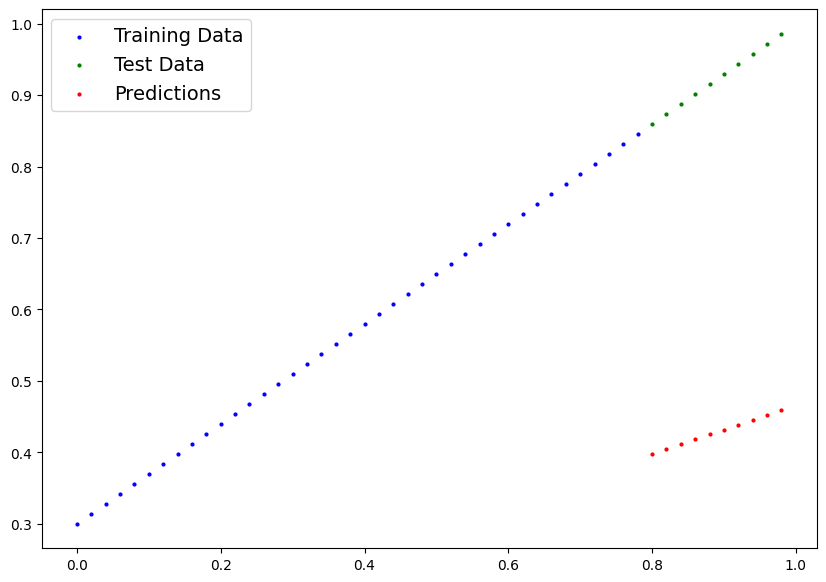

In [ ]:
# plot the prediction

plot_prediction(predictions=y_preds)

## Train the model

The whole idea of training is for a model to move from *unknown* parameters (these may be random) to some *known* parameters.and

or in the other word from a poor reperesentation of the data to a better representation of the data

One way to measure of how wrong our model predictions are we use the loss function.

* Note: Loss function may also be called an error function or cost function or criterion

### Things we need to train:
* **Loss Function:** A function to measure how wromg your model's prediction are to the ideal output, lower id better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's paramter(e.g. weight & bias)to improve the loss fucntion

And specifically for PyTorch,we need:

* A training loop
* A testing loop

More things :
* `params` -The model paramteres you would like to optimize, for example in our case model_0 parameters

* `lr (Learning Rate)`- The learning rate is a hyperparameter taht defines how big/small the optimizer changes the parameters with each step(a small lr resukt in small changes, a large lr results in large changes


In [ ]:
# Create the lossfunction

loss_fn = nn.L1Loss() # MAE loss is same as the L1Loss

# Create the optimizer
optimizer = torch.optim.SGD (params = model_0.parameters() ,lr = 0.01)
# learning rate (how much the optimizer should change parameters at each step ,higher=more(less stable) , lower=less(might take a long time))


# Building a training loop (and a testing loop) in PyTorch

A Couple of thing we need in a training loop:

0. Loop through the data
1. Forward pass(This involves data moving through our models `forward()` functions)to make predictions on propagation
2. Calculate the loss(compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameter of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [ ]:
# An epoch is one loop through the data...(this is the hyperparameter because we have set it ourselves)
epochs = 200

# create empty loss lists to track values
train_loss_values= []
test_loss_values = []
epoch_count = []


# 0. Loop through the data
for epoch in range(epochs):
  # set the model to the trainig mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradinets

  # 1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred,y_train)
  # print(f"Loss: {loss}")
  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. Perform the backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. step the optimizer (perform gradinet descent)
  optimizer.step() # by default how the optimizer changes will accumulate throught the loop so... we have to zero them above in the step 3

  model_0.eval() # turns off the gradient tracking

  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred , y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")
      print(model_0.state_dict())





Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE 

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

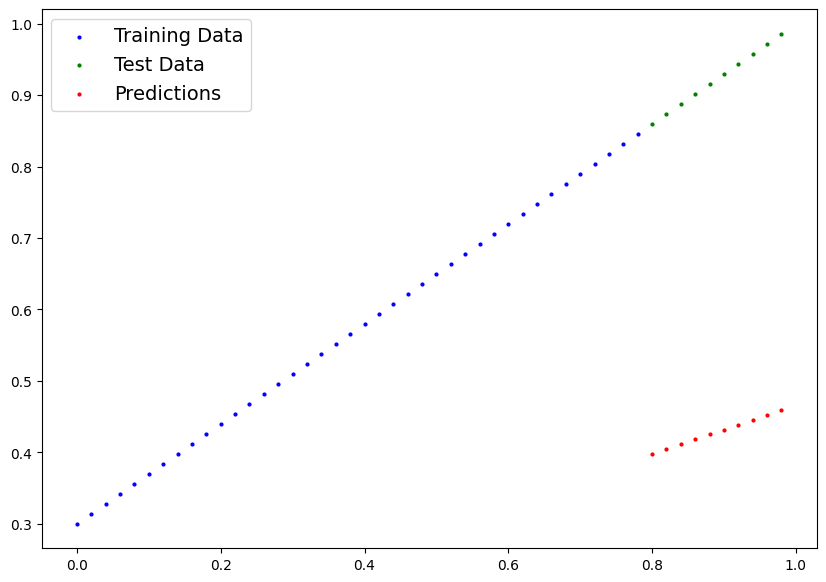

In [ ]:
plot_prediction(predictions=y_preds)

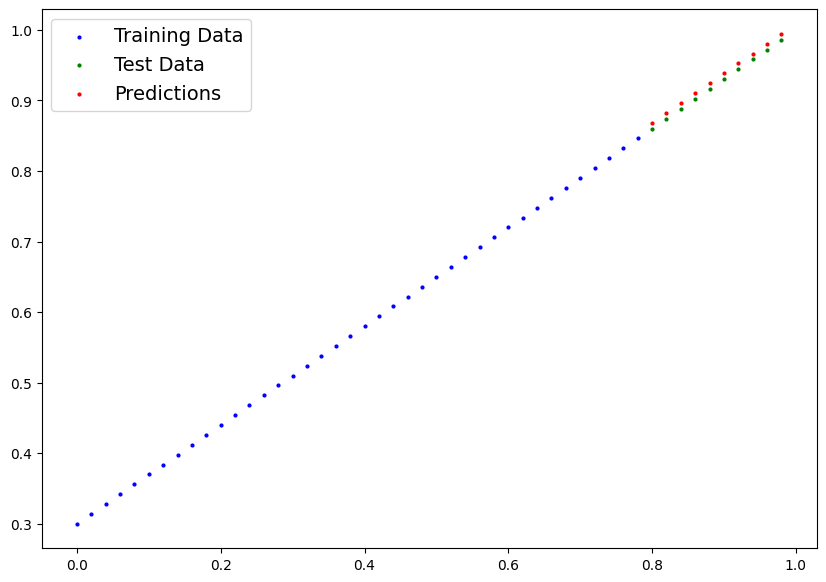

In [ ]:
plot_prediction(predictions=test_pred)

In [ ]:
train_loss_values , test_loss_values

([tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.08

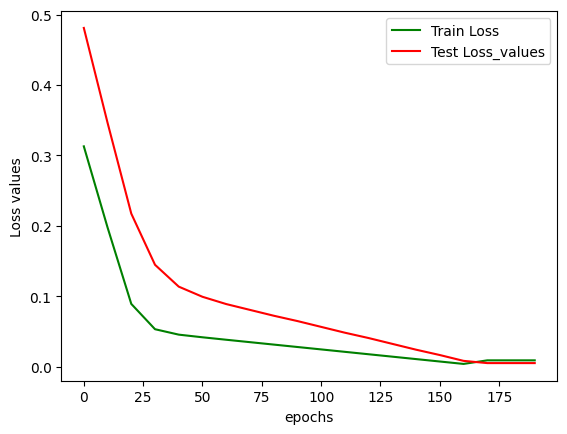

In [ ]:
# Plot the loss curves.
import numpy as np
plt.plot(epoch_count , np.array(torch.tensor(train_loss_values).numpy()) ,color = 'g' , label = 'Train Loss')
plt.plot(epoch_count , np.array(torch.tensor(test_loss_values).numpy()) , color = 'r' , label = 'Test Loss_values')
plt.xlabel('epochs')
plt.ylabel('Loss values')

plt.legend()

# Saving a pyTorch model's `state_dict()`

In [ ]:
from pathlib import Path

# 1. Create a models directory
model_path = Path('models')
model_path.mkdir(parents=True , exist_ok =True)

# 2. Create a model save path
model_name = "01_pytorch_workflow_model.pth"
model_save_path = model_path / model_name

# 3. save the model state
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_0.state_dict() , f=model_save_path)

Saving model to: models/01_pytorch_workflow_model.pth


In [ ]:
!ls -l models/01_pytorch_workflow_model.pth


-rw-r--r-- 1 root root 1668 Oct 23 16:12 models/01_pytorch_workflow_model.pth


# Loading a PyTorch model

since we saved our model's `state_dict()` rather than entire model,we'll create a new instance of our model class and load the saved `state_dict` into that

In [ ]:
torch.manual_seed(42)
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
# load the saved state_dict of model_0 (this will update the new instance with updated parameter)
loaded_model_0.load_state_dict(torch.load(f=model_save_path))

<ipython-input-36-6908c22ce468>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=model_save_path))


<All keys matched successfully>

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# make some predictions with our model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
model_0.eval()
with torch.inference_mode() :
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting every thing together of the workflow topic

In [ ]:
# imports the necessary libraries like pytorch , numpy and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt

# checking the pytorch version we are currently using
torch.__version__

'2.5.0+cu121'

# Creating the device agnostic code

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


# Creating the data

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end  = 1
step = 0.02

X = torch.arange(start , end,step).unsqueeze(dim = 1)
y = weight * X + bias

In [ ]:
print(X[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])


# Splitting the data set

In [ ]:
test_split = int(0.8 * len(X))
X_train , y_train = X[:test_split] , y[:test_split]
X_test , y_test = X[test_split:] , y[test_split:]


In [ ]:
print(X_train.shape,'-->' , y_train.shape)

torch.Size([40, 1]) --> torch.Size([40, 1])


In [ ]:
print(y_test.shape)

torch.Size([10, 1])


# Plot the data

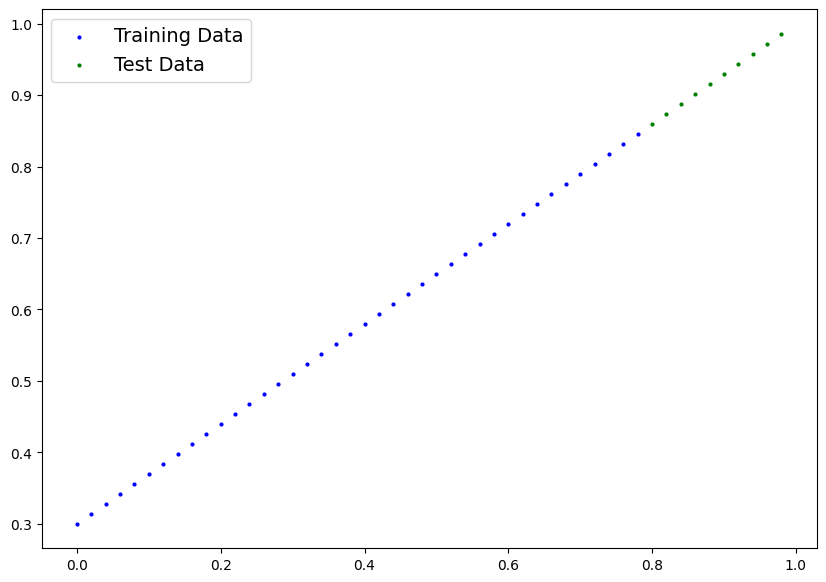

In [ ]:
plot_prediction()

# Building the pytorch linear model

In [ ]:
class LinearRegressionModelV2(nn.Module) :
  def __init__(self) :
    super().__init__()
    # use nn.Linear() for cerating the models parameters
    self.linear_layer = nn.Linear(in_features=1 , out_features = 1) # this means we take an input of size (1) and take an output of the size (1)
    # (x -> y) in the mapping of the x and y

  def forward (self , x:torch.Tensor) -> torch.Tensor :
    return self.linear_layer(x)

# setting the manual seed

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

# checking the model state dictionary

model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
# checking the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)  # (to) sends the models to the gpu memory
next(model_1.parameters()).device

device(type='cuda', index=0)

# Training the model
**For this we need the**
- Loss function
- optimizer

In [ ]:
loss_function = nn.L1Loss()  # L1Loss () is same as the MAE loss
optimizer = torch.optim.SGD(params = model_1.parameters() , lr = 0.01)


In [ ]:
# Now creating the trainig loop

torch.manual_seed(42)
epochs = 200

# we dont put the data to the gpu its on the cpu so we have to write the devoce agnostic code to move to the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
for epoch in range (epochs) :
  model_1.train()

  y_preds = model_1(X_train)

  loss  = loss_function(y_preds, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()  # enable the gradient descent to better represent the data by adjusting the parameters


# Testing the model

  model_1.eval()
  with torch.inference_mode() :
    test_preds = model_1(X_test)
    test_loss = loss_function(test_preds , y_test)

  if epoch % 10 == 0  :
    print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.5551779866218567 | MAE Test Loss: 0.5739762187004089
Epoch: 10 | MAE Train Loss: 0.439968079328537 | MAE Test Loss: 0.4392664134502411
Epoch: 20 | MAE Train Loss: 0.3247582018375397 | MAE Test Loss: 0.30455657839775085
Epoch: 30 | MAE Train Loss: 0.20954833924770355 | MAE Test Loss: 0.16984669864177704
Epoch: 40 | MAE Train Loss: 0.09433845430612564 | MAE Test Loss: 0.03513690456748009
Epoch: 50 | MAE Train Loss: 0.023886388167738914 | MAE Test Loss: 0.04784907028079033
Epoch: 60 | MAE Train Loss: 0.019956795498728752 | MAE Test Loss: 0.045803118497133255
Epoch: 70 | MAE Train Loss: 0.016517987474799156 | MAE Test Loss: 0.037530567497015
Epoch: 80 | MAE Train Loss: 0.013089174404740334 | MAE Test Loss: 0.02994490973651409
Epoch: 90 | MAE Train Loss: 0.009653178043663502 | MAE Test Loss: 0.02167237363755703
Epoch: 100 | MAE Train Loss: 0.006215683650225401 | MAE Test Loss: 0.014086711220443249
Epoch: 110 | MAE Train Loss: 0.00278724217787385 | MAE Test Loss:

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

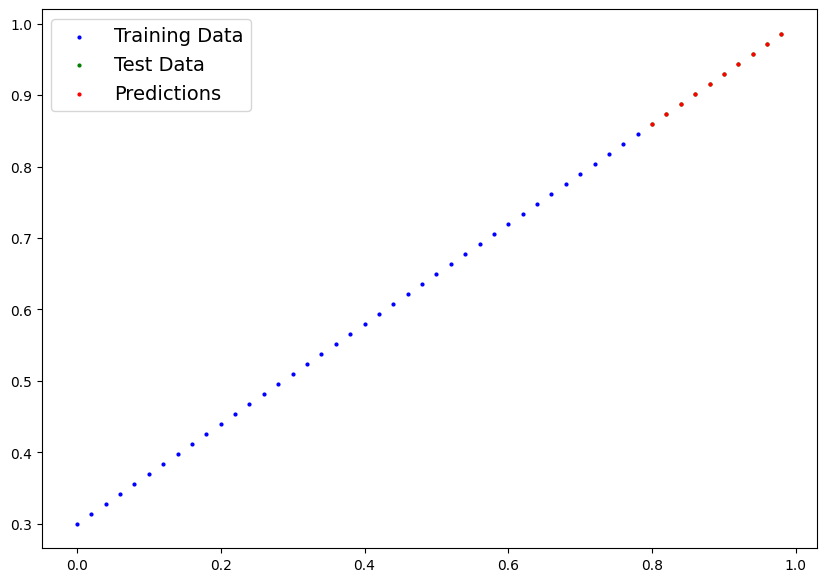

In [ ]:
import numpy as np
# matplotlib works with the numpy and numpy not run on the cuda so we have to turn our prediction back to cpu form making the plot
plot_prediction(predictions = test_preds.cpu())

# Loading and saving the load model

In [ ]:
from pathlib import Path

model_path = Path('model')
model_path.mkdir(parents=True , exist_ok = True)

model_name = '02_PYTORCH_PRACTICE.pth'
model_saved_path = model_path / model_name

# saving the model
torch.save(obj = model_1.state_dict() , f = model_saved_path)

In [ ]:
# Loading the model

loaded_model = LinearRegressionModelV2()
loaded_model.load_state_dict(torch.load(f=model_saved_path))
loaded_model.to(device)

<ipython-input-31-e3fe83845895>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=model_saved_path))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
loaded_model.eval()

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
with torch.inference_mode() :
  preds = loaded_model(X_test)

In [ ]:
test_preds == preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')